# Create a Web Application for an ETF Analyzer

In this Challenge assignment, you’ll build a financial database and web application by using SQL, Python, and the Voilà library to analyze the performance of a hypothetical fintech ETF.

Instructions: 

Use this notebook to complete your analysis of a fintech ETF that consists of four stocks: GOST, GS, PYPL, and SQ. Each stock has its own table in the `etf.db` database, which the `Starter_Code` folder also contains.

Analyze the daily returns of the ETF stocks both individually and as a whole. Then deploy the visualizations to a web application by using the Voilà library.

The detailed instructions are divided into the following parts:

* Analyze a single asset in the ETF

* Optimize data access with Advanced SQL queries

* Analyze the ETF portfolio

* Deploy the notebook as a web application

#### Analyze a Single Asset in the ETF

For this part of the assignment, you’ll use SQL queries with Python, Pandas, and hvPlot to analyze the performance of a single asset from the ETF.

Complete the following steps:

1. Write a SQL `SELECT` statement by using an f-string that reads all the PYPL data from the database. Using the SQL `SELECT` statement, execute a query that reads the PYPL data from the database into a Pandas DataFrame.

2. Use the `head` and `tail` functions to review the first five and the last five rows of the DataFrame. Make a note of the beginning and end dates that are available from this dataset. You’ll use this information to complete your analysis.

3. Using hvPlot, create an interactive visualization for the PYPL daily returns. Reflect the “time” column of the DataFrame on the x-axis. Make sure that you professionally style and format your visualization to enhance its readability.

4. Using hvPlot, create an interactive visualization for the PYPL cumulative returns. Reflect the “time” column of the DataFrame on the x-axis. Make sure that you professionally style and format your visualization to enhance its readability.

#### Optimize Data Access with Advanced SQL Queries

For this part of the assignment, you’ll continue to analyze a single asset (PYPL) from the ETF. You’ll use advanced SQL queries to optimize the efficiency of accessing data from the database.

Complete the following steps:

1. Access the closing prices for PYPL that are greater than 200 by completing the following steps:

    - Write a SQL `SELECT` statement to select the dates where the PYPL closing price was higher than 200.0.

    - Using the SQL statement, read the data from the database into a Pandas DataFrame, and then review the resulting DataFrame.

    - Select the “time” and “close” columns for those dates where the closing price was higher than 200.0.

2. Find the top 10 daily returns for PYPL by completing the following steps:

    -  Write a SQL statement to find the top 10 PYPL daily returns. Make sure to do the following:

        * Use `SELECT` to select only the “time” and “daily_returns” columns.

        * Use `ORDER` to sort the results in descending order by the “daily_returns” column.

        * Use `LIMIT` to limit the results to the top 10 daily return values.

    - Using the SQL statement, read the data from the database into a Pandas DataFrame, and then review the resulting DataFrame.

#### Analyze the ETF Portfolio

For this part of the assignment, you’ll build the entire ETF portfolio and then evaluate its performance. To do so, you’ll build the ETF portfolio by using SQL joins to combine all the data for each asset.

Complete the following steps:

1. Write a SQL query to join each table in the portfolio into a single DataFrame. To do so, complete the following steps:

    - Use a SQL inner join to join each table on the “time” column. Access the “time” column in the `GDOT` table via the `GDOT.time` syntax. Access the “time” columns from the other tables via similar syntax.

    - Using the SQL query, read the data from the database into a Pandas DataFrame. Review the resulting DataFrame.

2. Create a DataFrame that averages the “daily_returns” columns for all four assets. Review the resulting DataFrame.

    > **Hint** Assuming that this ETF contains equally weighted returns, you can average the returns for each asset to get the average returns of the portfolio. You can then use the average returns of the portfolio to calculate the annualized returns and the cumulative returns. For the calculation to get the average daily returns for the portfolio, use the following code:
    >
    > ```python
    > etf_portfolio_returns = etf_portfolio['daily_returns'].mean(axis=1)
    > ```
    >
    > You can use the average daily returns of the portfolio the same way that you used the daily returns of a single asset.

3. Use the average daily returns in the `etf_portfolio_returns` DataFrame to calculate the annualized returns for the portfolio. Display the annualized return value of the ETF portfolio.

> **Hint**  To calculate the annualized returns, multiply the mean of the `etf_portfolio_returns` values by 252.
>
> To convert the decimal values to percentages, multiply the results by 100.

4. Use the average daily returns in the `etf_portfolio_returns` DataFrame to calculate the cumulative returns of the ETF portfolio.

5. Using hvPlot, create an interactive line plot that visualizes the cumulative return values of the ETF portfolio. Reflect the “time” column of the DataFrame on the x-axis. Make sure that you professionally style and format your visualization to enhance its readability.

#### Deploy the Notebook as a Web Application

For this part of the assignment, complete the following steps:

1. Use the Voilà library to deploy your notebook as a web application. You can deploy the web application locally on your computer.

2. Take a screen recording or screenshots to show how the web application appears when using Voilà. Include the recording or screenshots in the `README.md` file for your GitHub repository.


## Review the following code which imports the required libraries, initiates your SQLite database, popluates the database with records from the `etf.db` seed file that was included in your Starter_Code folder, creates the database engine, and confirms that data tables that it now contains.

In [9]:
# Importing the required libraries and dependencies
import numpy as np
import pandas as pd
import hvplot.pandas
import sqlalchemy

# Create a temporary SQLite database and populate the database with content from the etf.db seed file
database_connection_string = 'sqlite:///etf.db'

# Create an engine to interact with the SQLite database
engine = sqlalchemy.create_engine(database_connection_string)

# Confirm that table names contained in the SQLite database.
engine.table_names()

C:\Users\Afsaneh\AppData\Local\Temp\ipykernel_13344\3092246052.py:14: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['GDOT', 'GS', 'PYPL', 'SQ']

## Analyze a single asset in the FinTech ETF

For this part of the assignment, you’ll use SQL queries with Python, Pandas, and hvPlot to analyze the performance of a single asset from the ETF.

Complete the following steps:

1. Write a SQL `SELECT` statement by using an f-string that reads all the PYPL data from the database. Using the SQL `SELECT` statement, execute a query that reads the PYPL data from the database into a Pandas DataFrame.

2. Use the `head` and `tail` functions to review the first five and the last five rows of the DataFrame. Make a note of the beginning and end dates that are available from this dataset. You’ll use this information to complete your analysis.

3. Using hvPlot, create an interactive visualization for the PYPL daily returns. Reflect the “time” column of the DataFrame on the x-axis. Make sure that you professionally style and format your visualization to enhance its readability.

4. Using hvPlot, create an interactive visualization for the PYPL cumulative returns. Reflect the “time” column of the DataFrame on the x-axis. Make sure that you professionally style and format your visualization to enhance its readability.



### Step 1: Write a SQL `SELECT` statement by using an f-string that reads all the PYPL data from the database. Using the SQL `SELECT` statement, execute a query that reads the PYPL data from the database into a Pandas DataFrame.

In [55]:
# Write a SQL query to SELECT all of the data from the PYPL table
query = """
SELECT * FROM PYPL; 
"""
# Use the query to read the PYPL data into a Pandas DataFrame
pypl_dataframe = pd.read_sql_query(query, con=engine) # time isn't in index
#connect to sqlite file
pypl_dataframe.set_index("time", inplace=True)   

### Step 2: Use the `head` and `tail` functions to review the first five and the last five rows of the DataFrame. Make a note of the beginning and end dates that are available from this dataset. You’ll use this information to complete your analysis.

In [56]:
# View the first 5 rows of the DataFrame.
pypl_dataframe.head()



,open,high,low,close,volume,daily_returns
time,,,,,,
2016-12-16 00:00:00.000000,39.90,39.90,39.12,39.32,7298861,-0.005564
2016-12-19 00:00:00.000000,39.40,39.80,39.11,39.45,3436478,0.003306
2016-12-20 00:00:00.000000,39.61,39.74,39.26,39.74,2940991,0.007351
2016-12-21 00:00:00.000000,39.84,40.74,39.82,40.09,5826704,0.008807
2016-12-22 00:00:00.000000,40.04,40.09,39.54,39.68,4338385,-0.010227


In [48]:
pypl_dataframe

,open,high,low,close,volume,daily_returns
time,,,,,,
2016-12-16 00:00:00.000000,39.90,39.90,39.1200,39.320,7298861,-0.005564
2016-12-19 00:00:00.000000,39.40,39.80,39.1100,39.450,3436478,0.003306
2016-12-20 00:00:00.000000,39.61,39.74,39.2600,39.740,2940991,0.007351
2016-12-21 00:00:00.000000,39.84,40.74,39.8200,40.090,5826704,0.008807
2016-12-22 00:00:00.000000,40.04,40.09,39.5400,39.680,4338385,-0.010227
...,...,...,...,...,...,...
2020-11-30 00:00:00.000000,212.51,215.83,207.0900,214.200,8992681,0.013629
2020-12-01 00:00:00.000000,217.15,220.57,214.3401,216.520,9148174,0.010831
2020-12-02 00:00:00.000000,215.60,215.75,210.5000,212.660,6414746,-0.017827


In [12]:
# View the last 5 rows of the DataFrame.
pypl_dataframe.tail()


,time,open,high,low,close,volume,daily_returns
994,2020-11-30 00:00:00.000000,212.51,215.83,207.0900,214.200,8992681,0.013629
995,2020-12-01 00:00:00.000000,217.15,220.57,214.3401,216.520,9148174,0.010831
996,2020-12-02 00:00:00.000000,215.60,215.75,210.5000,212.660,6414746,-0.017827
997,2020-12-03 00:00:00.000000,213.33,216.93,213.1100,214.680,6463339,0.009499
998,2020-12-04 00:00:00.000000,214.88,217.28,213.0100,217.235,2118319,0.011901


In [13]:
pypl_dataframe['time'] = pd.to_datetime(pypl_dataframe['time']).dt.strftime('%Y-%m-%d')

In [14]:
pypl_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           999 non-null    object 
 1   open           999 non-null    float64
 2   high           999 non-null    float64
 3   low            999 non-null    float64
 4   close          999 non-null    float64
 5   volume         999 non-null    int64  
 6   daily_returns  999 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 54.8+ KB


In [15]:
pypl_dataframe

,time,open,high,low,close,volume,daily_returns
0,2016-12-16,39.90,39.90,39.1200,39.320,7298861,-0.005564
1,2016-12-19,39.40,39.80,39.1100,39.450,3436478,0.003306
2,2016-12-20,39.61,39.74,39.2600,39.740,2940991,0.007351
3,2016-12-21,39.84,40.74,39.8200,40.090,5826704,0.008807
4,2016-12-22,40.04,40.09,39.5400,39.680,4338385,-0.010227
...,...,...,...,...,...,...,...
994,2020-11-30,212.51,215.83,207.0900,214.200,8992681,0.013629
995,2020-12-01,217.15,220.57,214.3401,216.520,9148174,0.010831
996,2020-12-02,215.60,215.75,210.5000,212.660,6414746,-0.017827
997,2020-12-03,213.33,216.93,213.1100,214.680,6463339,0.009499


### Step 3: Using hvPlot, create an interactive visualization for the PYPL daily returns. Reflect the “time” column of the DataFrame on the x-axis. Make sure that you professionally style and format your visualization to enhance its readability.

In [17]:
# Create an interactive visualization with hvplot to plot the daily returns for PYPL.
pypl_daliy_return = pypl_dataframe[['time', 'daily_returns']].hvplot(
    x='time', 
    title="PYPL Daily Returns",
    xlabel="Date",
    ylabel="Daily Return Value",
    rot=90
).opts(yformatter='%.0f')
pypl_daliy_return

:Curve   [time]   (daily_returns)

### Step 4: Using hvPlot, create an interactive visualization for the PYPL cumulative returns. Reflect the “time” column of the DataFrame on the x-axis. Make sure that you professionally style and format your visualization to enhance its readability.

<AxesSubplot:>

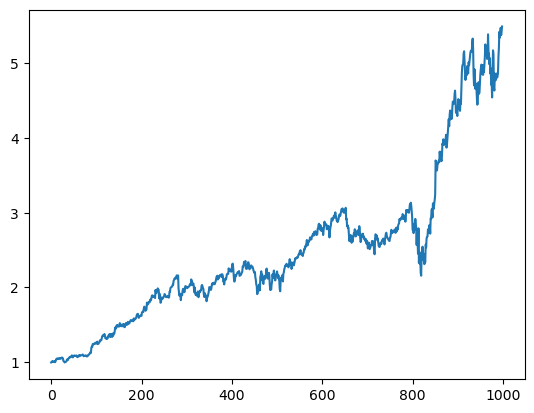

In [40]:
# Create an interactive visaulization with hvplot to plot the cumulative returns for PYPL.
cumulative_returns = (1 + pypl_dataframe['daily_returns']).cumprod()
cumulative_returns.plot()

## Optimize the SQL Queries

For this part of the assignment, you’ll continue to analyze a single asset (PYPL) from the ETF. You’ll use advanced SQL queries to optimize the efficiency of accessing data from the database.

Complete the following steps:

1. Access the closing prices for PYPL that are greater than 200 by completing the following steps:

1. Access the closing prices for PYPL that are greater than 200 by completing the following steps:

    - Write a SQL `SELECT` statement to select the dates where the PYPL closing price was higher than 200.0.

    - Select the “time” and “close” columns for those dates where the closing price was higher than 200.0.

    - Using the SQL statement, read the data from the database into a Pandas DataFrame, and then review the resulting DataFrame.

2. Find the top 10 daily returns for PYPL by completing the following steps:

    -  Write a SQL statement to find the top 10 PYPL daily returns. Make sure to do the following:

        * Use `SELECT` to select only the “time” and “daily_returns” columns.

        * Use `ORDER` to sort the results in descending order by the “daily_returns” column.

        * Use `LIMIT` to limit the results to the top 10 daily return values.

    - Using the SQL statement, read the data from the database into a Pandas DataFrame, and then review the resulting DataFrame.


### Step 1: Access the closing prices for PYPL that are greater than 200 by completing the following steps:

    - Write a SQL `SELECT` statement to select the dates where the PYPL closing price was higher than 200.0.

    - Select the “time” and “close” columns for those dates where the closing price was higher than 200.0.

    - Using the SQL statement, read the data from the database into a Pandas DataFrame, and then review the resulting DataFrame.


In [19]:
# Write a SQL SELECT statement to select the time and close columns 
# where the PYPL closing price was higher than 200.0.
query = """ 
SELECT time, close From PYPL
WHERE close > 200;
"""

pypl_close = pd.read_sql_query(query, con=engine)
pypl_close['time'] = pd.to_datetime(pypl_close['time']).dt.strftime('%Y-%m-%d')
pypl_close


,time,close
0,2020-08-05,202.920
1,2020-08-06,204.090
2,2020-08-25,201.710
3,2020-08-26,203.530
4,2020-08-27,204.340
5,2020-08-28,204.480
6,2020-08-31,203.950
7,2020-09-01,208.920
8,2020-09-02,210.820
9,2020-09-03,205.070


In [20]:
# Using the query, read the data from the database into a Pandas DataFrame
pypl_higher_than_200 = pypl_close
pypl_higher_than_200.set_index("time")
# Review the resulting DataFrame
pypl_higher_than_200

,time,close
0,2020-08-05,202.920
1,2020-08-06,204.090
2,2020-08-25,201.710
3,2020-08-26,203.530
4,2020-08-27,204.340
5,2020-08-28,204.480
6,2020-08-31,203.950
7,2020-09-01,208.920
8,2020-09-02,210.820
9,2020-09-03,205.070


### Step 2: Find the top 10 daily returns for PYPL by completing the following steps:

    -  Write a SQL statement to find the top 10 PYPL daily returns. Make sure to do the following:

        * Use `SELECT` to select only the “time” and “daily_returns” columns.

        * Use `ORDER` to sort the results in descending order by the “daily_returns” column.

        * Use `LIMIT` to limit the results to the top 10 daily return values.

    - Using the SQL statement, read the data from the database into a Pandas DataFrame, and then review the resulting DataFrame.


In [21]:
# Write a SQL SELECT statement to select the time and daily_returns columns
# Sort the results in descending order and return only the top 10 return values
query = """ 
SELECT time, daily_returns From PYPL
ORDER BY daily_returns DESC
LIMIT 10;
"""
# Using the query, read the data from the database into a Pandas DataFrame
pypl_top_10_returns = pd.read_sql_query(query, con=engine)
pypl_top_10_returns['time'] = pd.to_datetime(pypl_top_10_returns['time']).dt.strftime('%Y-%m-%d')
# Review the resulting DataFrame
pypl_top_10_returns


,time,daily_returns
0,2020-03-24,0.140981
1,2020-05-07,0.140318
2,2020-03-13,0.138700
3,2020-04-06,0.100877
4,2018-10-19,0.093371
5,2019-10-24,0.085912
6,2020-11-04,0.080986
7,2020-03-10,0.080863
8,2020-04-22,0.075321
9,2018-12-26,0.074656


## Analyze the Fintech ETF Portfolio

For this part of the assignment, you’ll build the entire ETF portfolio and then evaluate its performance. To do so, you’ll build the ETF portfolio by using SQL joins to combine all the data for each asset.

Complete the following steps:

1. Write a SQL query to join each table in the portfolio into a single DataFrame. To do so, complete the following steps:

    - Use a SQL inner join to join each table on the “time” column. Access the “time” column in the `GDOT` table via the `GDOT.time` syntax. Access the “time” columns from the other tables via similar syntax.

    - Using the SQL query, read the data from the database into a Pandas DataFrame. Review the resulting DataFrame.

2. Create a DataFrame that averages the “daily_returns” columns for all four assets. Review the resulting DataFrame.

    > **Hint** Assuming that this ETF contains equally weighted returns, you can average the returns for each asset to get the average returns of the portfolio. You can then use the average returns of the portfolio to calculate the annualized returns and the cumulative returns. For the calculation to get the average daily returns for the portfolio, use the following code:
    >
    > ```python
    > etf_portfolio_returns = etf_portfolio['daily_returns'].mean(axis=1)
    > ```
    >
    > You can use the average daily returns of the portfolio the same way that you used the daily returns of a single asset.

3. Use the average daily returns in the `etf_portfolio_returns` DataFrame to calculate the annualized returns for the portfolio. Display the annualized return value of the ETF portfolio.

> **Hint**  To calculate the annualized returns, multiply the mean of the `etf_portfolio_returns` values by 252.
>
> To convert the decimal values to percentages, multiply the results by 100.

4. Use the average daily returns in the `etf_portfolio_returns` DataFrame to calculate the cumulative returns of the ETF portfolio.

5. Using hvPlot, create an interactive line plot that visualizes the cumulative return values of the ETF portfolio. Reflect the “time” column of the DataFrame on the x-axis. Make sure that you professionally style and format your visualization to enhance its readability.


### Step 1: Write a SQL query to join each table in the portfolio into a single DataFrame. To do so, complete the following steps:

    - Use a SQL inner join to join each table on the “time” column. Access the “time” column in the `GDOT` table via the `GDOT.time` syntax. Access the “time” columns from the other tables via similar syntax.

    - Using the SQL query, read the data from the database into a Pandas DataFrame. Review the resulting DataFrame.

In [71]:
# Wreate a SQL query to join each table in the portfolio into a single DataFrame 
# Use the time column from each table as the basis for the join
query = """
SELECT *
FROM GDOT
JOIN GS
ON GDOT.time=GS.time
JOIN PYPL
ON GS.time=PYPL.time
JOIN SQ
ON PYPL.time=SQ.time;
"""

# Using the query, read the data from the database into a Pandas DataFrame
etf_portfolio = pd.read_sql_query(query, con=engine)
# Review the resulting DataFrame
etf_portfolio.head()
etf_portfolio.columns

Index(['time', 'open', 'high', 'low', 'close', 'volume', 'daily_returns',
       'time', 'open', 'high', 'low', 'close', 'volume', 'daily_returns',
       'time', 'open', 'high', 'low', 'close', 'volume', 'daily_returns',
       'time', 'open', 'high', 'low', 'close', 'volume', 'daily_returns'],
      dtype='object')

### Step 2: Create a DataFrame that averages the “daily_returns” columns for all four assets. Review the resulting DataFrame.

In [23]:
# Create a DataFrame that displays the mean value of the “daily_returns” columns for all four assets.
etf_portfolio_returns = etf_portfolio['daily_returns'].mean(axis=1)
# Review the resulting DataFrame
etf_portfolio_returns.head()

0   -0.007038
1   -0.001216
2    0.008567
3   -0.001004
4   -0.008243
dtype: float64

In [69]:
pd.concat([etf_portfolio_returns,etf_portfolio.iloc[:,0]],axis=1)

,0,time
0,-0.007038,2016-12-16 00:00:00.000000
1,-0.001216,2016-12-19 00:00:00.000000
2,0.008567,2016-12-20 00:00:00.000000
3,-0.001004,2016-12-21 00:00:00.000000
4,-0.008243,2016-12-22 00:00:00.000000
...,...,...
994,-0.014635,2020-11-30 00:00:00.000000
995,-0.003990,2020-12-01 00:00:00.000000
996,-0.006288,2020-12-02 00:00:00.000000
997,0.011246,2020-12-03 00:00:00.000000


### Step 3: Use the average daily returns in the etf_portfolio_returns DataFrame to calculate the annualized returns for the portfolio. Display the annualized return value of the ETF portfolio.

In [24]:
# Use the average daily returns provided by the etf_portfolio_returns DataFrame 
# to calculate the annualized return for the portfolio. 
annualized_etf_portfolio_returns = etf_portfolio_returns * 252

# Display the annualized return value of the ETF portfolio.
annualized_etf_portfolio_returns.head()



0   -1.773496
1   -0.306518
2    2.158814
3   -0.252987
4   -2.077206
dtype: float64

In [ ]:
annualized_etf_portfolio_returns_prc = annualized_etf_portfolio_returns * 100
annualized_etf_portfolio_returns_prc.head()

### Step 4: Use the average daily returns in the `etf_portfolio_returns` DataFrame to calculate the cumulative returns of the ETF portfolio.

In [25]:
# Use the average daily returns provided by the etf_portfolio_returns DataFrame 
# to calculate the cumulative returns
etf_cumulative_returns = (1+ etf_portfolio['daily_returns']).cumprod()

# Display the final cumulative return value
etf_cumulative_returns.columns = ["GDOT_daily_returns",
                                  "SG_daily_returns",
                                  "PYPL_daily_returns", "SQ_daily_returns"]
etf_cumulative_returns

,GDOT_daily_returns,SG_daily_returns,PYPL_daily_returns,SQ_daily_returns
0,0.976782,0.983292,0.994436,1.017339
1,0.969043,0.984074,0.997724,1.016277
2,0.970265,1.000412,1.005058,1.025478
3,0.971894,0.993498,1.013910,1.017693
4,0.977800,0.988354,1.003541,0.993631
...,...,...,...,...
994,2.181263,0.948889,5.417299,14.931352
995,2.191039,0.955103,5.475974,14.366596
996,2.131161,0.978395,5.378351,14.303609
997,2.189817,0.969630,5.429439,14.545648


### Step 5: Using hvPlot, create an interactive line plot that visualizes the cumulative return values of the ETF portfolio. Reflect the “time” column of the DataFrame on the x-axis. Make sure that you professionally style and format your visualization to enhance its readability.

In [59]:
etf_cumulative_returns

,GDOT_daily_returns,SG_daily_returns,PYPL_daily_returns,SQ_daily_returns
0,0.976782,0.983292,0.994436,1.017339
1,0.969043,0.984074,0.997724,1.016277
2,0.970265,1.000412,1.005058,1.025478
3,0.971894,0.993498,1.013910,1.017693
4,0.977800,0.988354,1.003541,0.993631
...,...,...,...,...
994,2.181263,0.948889,5.417299,14.931352
995,2.191039,0.955103,5.475974,14.366596
996,2.131161,0.978395,5.378351,14.303609
997,2.189817,0.969630,5.429439,14.545648


In [70]:
# Using hvplot, create an interactive line plot that visualizes the ETF portfolios cumulative return values.
etf_plot = etf_cumulative_returns.hvplot( 
    title="ETF portfolio cumulative daily returns",
    xlabel="Date",
    ylabel="Cumulative Daily Return Value",
    rot=90
).opts(yformatter='%.0f')
etf_plot

:NdOverlay   [Variable]
   :Curve   [index]   (value)